In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import librosa as lb
import librosa.display
import os

import IPython
import IPython.display as ipd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses, regularizers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import visualkeras


In [3]:
features_30s = pd.read_csv('/Users/johndinh/sta221-deeplearning/Project/Music Classification /Data/features_30_sec.csv')

In [4]:
X = pd.DataFrame(features_30s.iloc[:, 2:-1])
y =pd.DataFrame(features_30s.iloc[:, -1])

In [5]:
from sklearn import preprocessing


X_scaled = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns= X.columns)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

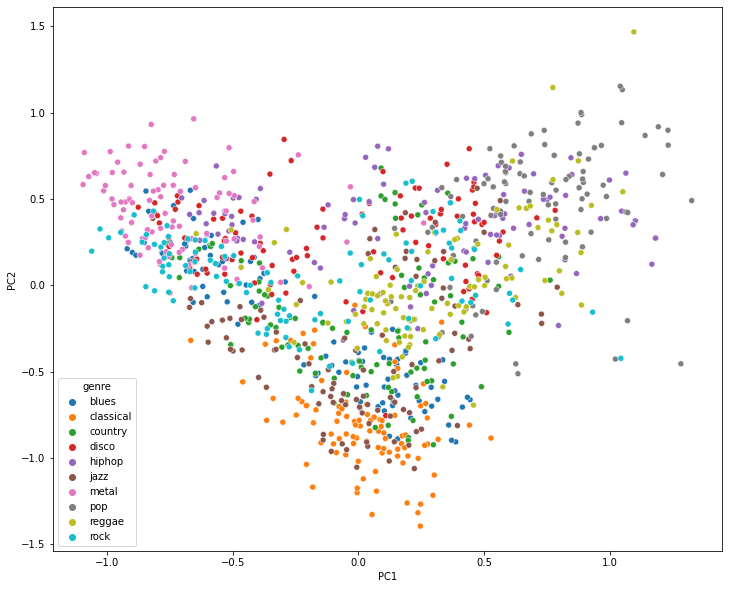

In [6]:
#PCA PLOT with 2 components 
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pcdf = pd.DataFrame(pca.fit_transform(X_scaled), columns  = ['PC1', 'PC2'])
pcdf = pd.DataFrame(np.concatenate((pcdf, np.array(y)), axis = 1), columns = ['PC1', 'PC2', 'genre'])
plt.figure(figsize= (12, 10))
sns.scatterplot(data = pcdf, x = 'PC1', y =  'PC2', hue = 'genre')

In [7]:
#converting labels 
y = pd.DataFrame(y)
labels_dictionary = {
    'blues': 0,
    'classical': 1, 
    'country': 2,
    'disco': 3,
    'hiphop': 4, 
    'jazz': 5,
    'metal': 6, 
    'pop': 7,
    'reggae': 8,
    'rock': 9
}

for i in range(len(y)):
    y.iloc[i] = labels_dictionary[y.iloc[i].values[0]]

In [8]:
#Standardizing dataset
scaler = preprocessing.StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [9]:
#training test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = .25)

In [10]:
#Understanding The Audio File:
audio_recording = '/Users/johndinh/sta221-deeplearning/Project/Music Classification /Data/genres_original/jazz/jazz.00004.wav'
data, sr = librosa.load(audio_recording)

/Users/johndinh/miniforge3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


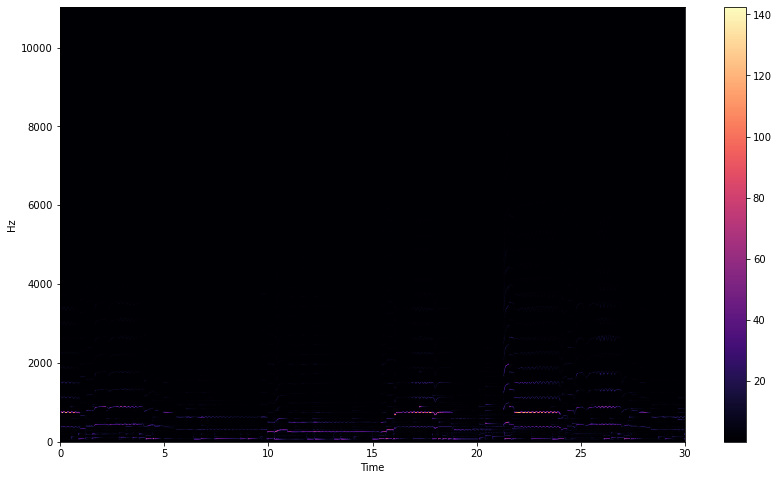

In [11]:
#spectrogram

stft = librosa.stft(data)
stft_dub = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,8))

#Short time fourier transform 

""""
Represents a signial using discrete fourier transform over short 
overlapping window 
"""

librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

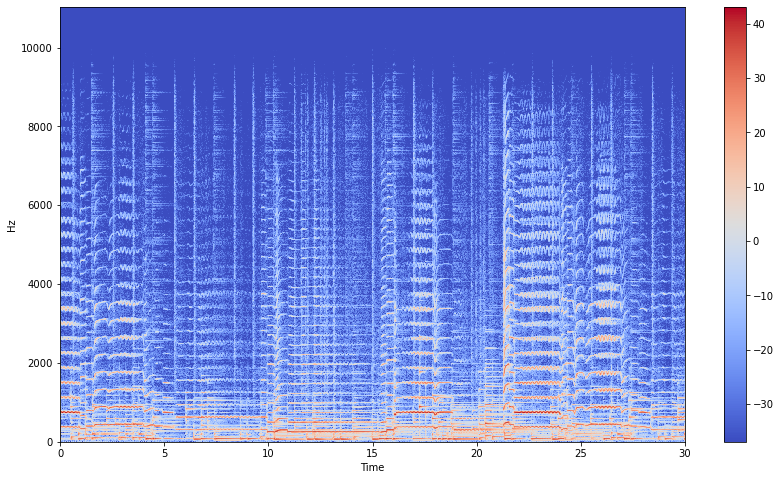

In [12]:
plt.figure(figsize=(14,8))

"""
Converted ampltitude dB-scaled 
"""
librosa.display.specshow(stft_dub,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

In [13]:
#Spectral Roll Off

""""
Spectral roll off: frequency below which a specified 
% of the total spectral energy lies 
"""
spectral_rolloff=librosa.feature.spectral_rolloff(data,sr=sr)[0]
plt.figure(figsize=(14,6))
waveshow(data,sr=sr,alpha=0.4,color="#1a27a3")

/var/folders/z0/40pnzbvj58xcgg6q7p6vl6mw0000gn/T/ipykernel_52422/3524501299.py:7: FutureWarning: Pass y=[0.12203979 0.22442627 0.19665527 ... 0.0116272  0.03677368 0.05535889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff=librosa.feature.spectral_rolloff(data,sr=sr)[0]


NameError: name 'waveshow' is not defined

<Figure size 1008x432 with 0 Axes>

/var/folders/z0/40pnzbvj58xcgg6q7p6vl6mw0000gn/T/ipykernel_52422/3009635177.py:8: FutureWarning: Pass y=[0.12203979 0.22442627 0.19665527 ... 0.0116272  0.03677368 0.05535889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr = sr)


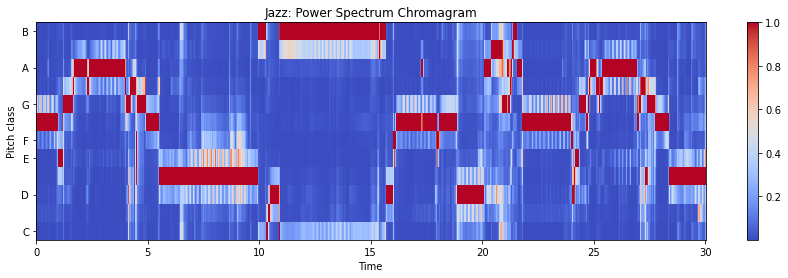

In [15]:
#Chroma Features 

"""
Captures harmonic and melodic characteristics of music
"""
import librosa.display as lplt

chroma = librosa.feature.chroma_stft(data, sr = sr)
plt.figure(figsize=(15, 4))
lplt.specshow(chroma, sr = sr, x_axis = 'time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.title('Jazz: Power Spectrum Chromagram')

plt.show()

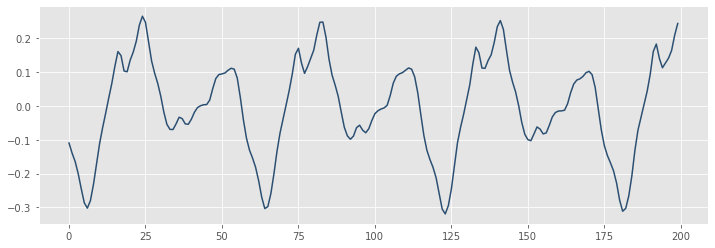

In [60]:
#Zero Crossing Rate 
plt.figure(figsize= (12, 4))

plt.plot(data[800:1000], color = '#2B4F72')
plt.show()